In [35]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from redist import modifier
import knunu_utils

from bayesian_pyhf import plotting
import arviz as az
import corner

In [36]:
null = knunu_utils.null_pred()
alt = knunu_utils.alt_pred()

In [37]:
model, alt_yields = modifier.load('knunu_model.json', alt.distribution, null.distribution, return_data=True)

## Load and plot samples

In [38]:
post_data = az.from_json( 'samples/knunu_post_data.json')
post_pred = az.from_json( 'samples/knunu_post_pred.json')
prior_pred = az.from_json('samples/knunu_prior_pred.json')

In [39]:
post_data.posterior

<xarray.Dataset>
Dimensions:                    (chain: 8, draw: 10000, cvr_dim_0: 1,
                                csr_dim_0: 1, FFK_decorrelated[0]_dim_0: 1,
                                FFK_decorrelated[1]_dim_0: 1,
                                FFK_decorrelated[2]_dim_0: 1,
                                FFK_decorrelated[3]_dim_0: 1,
                                FFK_decorrelated[4]_dim_0: 1,
                                FFK_decorrelated[5]_dim_0: 1,
                                FFK_decorrelated[6]_dim_0: 1,
                                FFK_decorrelated[7]_dim_0: 1, mu_dim_0: 1,
                                stat_dim_0: 8, cvl_dim_0: 1, csl_dim_0: 1,
                                ctl_dim_0: 1)
Coordinates: (12/17)
  * chain                      (chain) int64 0 1 2 3 4 5 6 7
  * draw                       (draw) int64 0 1 2 3 4 ... 9996 9997 9998 9999
  * cvr_dim_0                  (cvr_dim_0) int64 0
  * csr_dim_0                  (csr_dim_0) int64 0
  * FFK_decorrelated[0]_dim_0  (FFK_decorrelated[0]_dim_0) int64 0
  * FFK_decorrelated[1]_dim_0  (FFK_decorrelated[1]_dim_0) int64 0
    ...                         ...
  * FFK_decorrelated[7]_dim_0  (FFK_decorrelated[7]_dim_0) int64 0
  * mu_dim_0                   (mu_dim_0) int64 0
  * stat_dim_0                 (stat_dim_0) int64 0 1 2 3 4 5 6 7
  * cvl_dim_0                  (cvl_dim_0) int64 0
  * csl_dim_0                  (csl_dim_0) int64 0
  * ctl_dim_0                  (ctl_dim_0) int64 0
Data variables: (12/15)
    cvr                        (chain, draw, cvr_dim_0) float64 -4.151e-11 .....
    csr                        (chain, draw, csr_dim_0) float64 -8.157e-11 .....
    FFK_decorrelated[0]        (chain, draw, FFK_decorrelated[0]_dim_0) float64 ...
    FFK_decorrelated[1]        (chain, draw, FFK_decorrelated[1]_dim_0) float64 ...
    FFK_decorrelated[2]        (chain, draw, FFK_decorrelated[2]_dim_0) float64 ...
    FFK_decorrelated[3]        (chain, draw, FFK_decorrelated[3]_dim_0) float64 ...
    ...                         ...
    FFK_decorrelated[7]        (chain, draw, FFK_decorrelated[7]_dim_0) float64 ...
    mu                         (chain, draw, mu_dim_0) float64 1.0 1.0 ... 1.0
    stat                       (chain, draw, stat_dim_0) float64 1.1 ... 1.33
    cvl                        (chain, draw, cvl_dim_0) float64 5.233 ... 5.866
    csl                        (chain, draw, csl_dim_0) float64 0.574 ... 1.273
    ctl                        (chain, draw, ctl_dim_0) float64 2.3 ... 1.657
Attributes:
    created_at:                 2023-12-19T13:34:31.672946
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.10.2
    sampling_time:              504.1225657463074
    tuning_steps:               1000

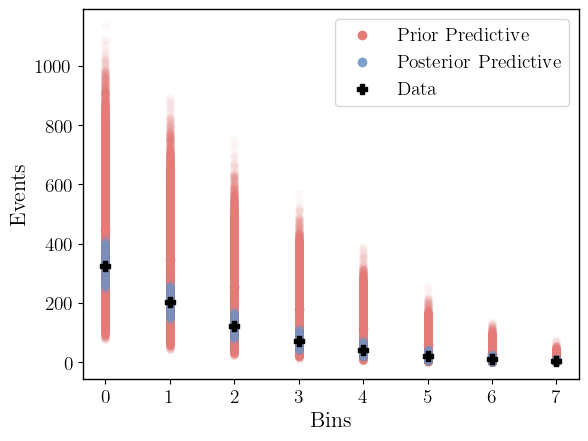

In [40]:
plotting.prior_posterior_predictives(model=model, data=alt_yields, post_pred=post_pred, prior_pred=prior_pred)
plt.show()

array([[<Axes: title={'center': 'FFK_decorrelated[6]'}>,
        <Axes: title={'center': 'FFK_decorrelated[6]'}>],
       [<Axes: title={'center': 'FFK_decorrelated[1]'}>,
        <Axes: title={'center': 'FFK_decorrelated[1]'}>],
       [<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'FFK_decorrelated[3]'}>,
        <Axes: title={'center': 'FFK_decorrelated[3]'}>],
       [<Axes: title={'center': 'stat'}>,
        <Axes: title={'center': 'stat'}>],
       [<Axes: title={'center': 'csr'}>, <Axes: title={'center': 'csr'}>],
       [<Axes: title={'center': 'cvr'}>, <Axes: title={'center': 'cvr'}>],
       [<Axes: title={'center': 'FFK_decorrelated[5]'}>,
        <Axes: title={'center': 'FFK_decorrelated[5]'}>],
       [<Axes: title={'center': 'FFK_decorrelated[4]'}>,
        <Axes: title={'center': 'FFK_decorrelated[4]'}>],
       [<Axes: title={'center': 'ctl'}>, <Axes: title={'center': 'ctl'}>],
       [<Axes: title={'center': 'cvl'}>, <

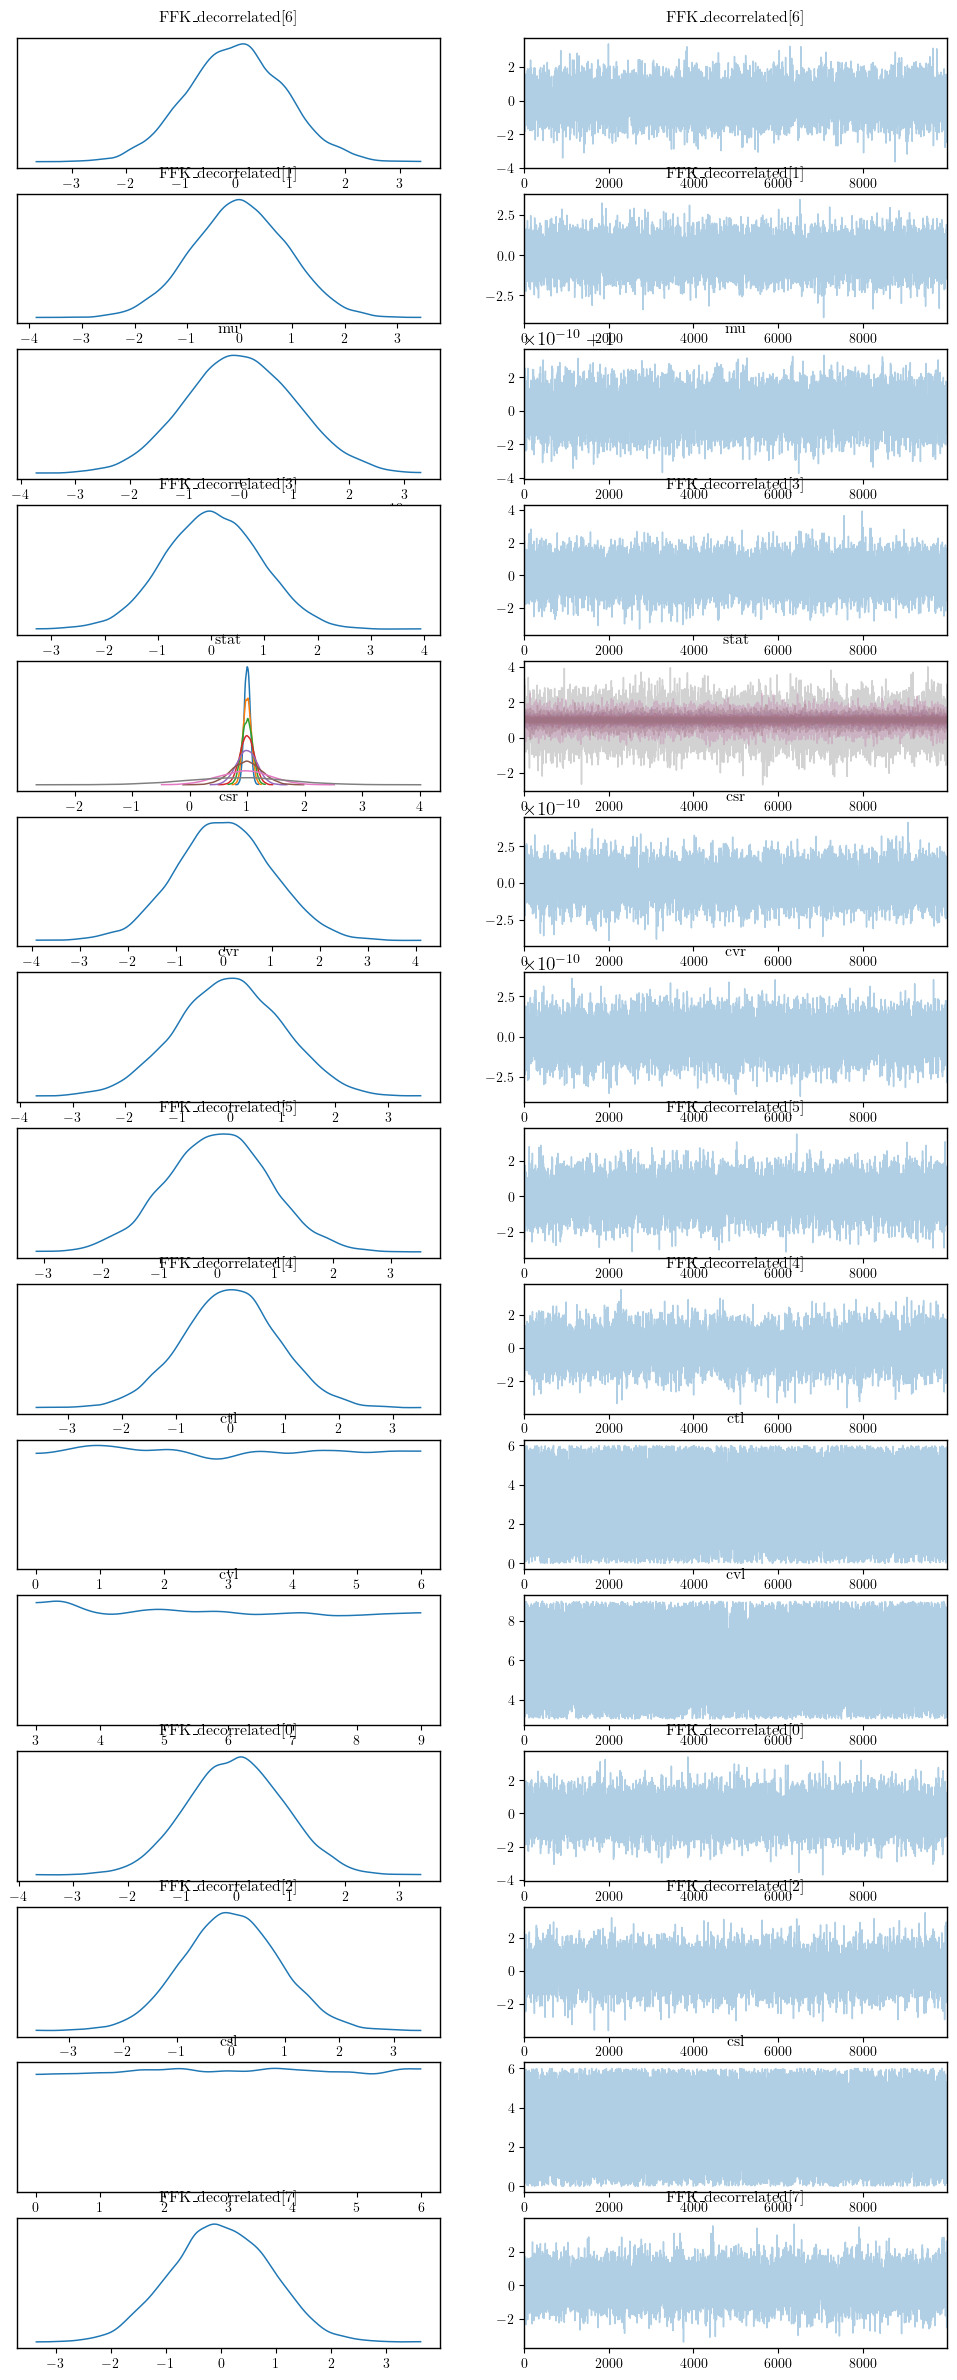

In [41]:
az.plot_trace(prior_pred.prior)

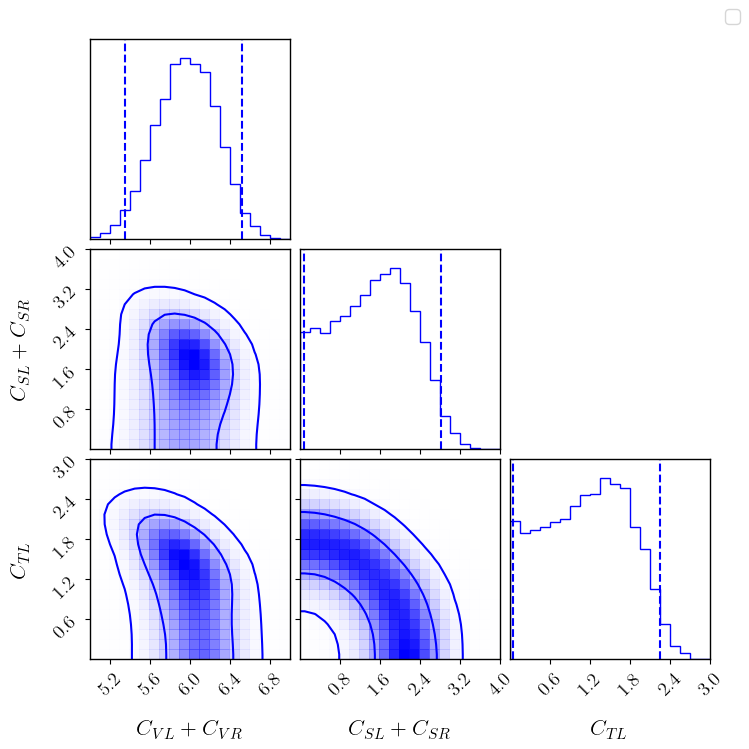

In [42]:
cv = r'$C_{VL} + C_{VR}$'
cs = r'$C_{SL} + C_{SR}$'
ct = r'$C_{TL}$'
labels = [cv, cs, ct]

file = 'results/knunu_samples.pdf'


fig = corner.corner(post_data.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=20, 
                    levels=(0.68, 0.95), 
                    quantiles=(0.025, 0.975), 
                    range = [(5.0, 7.0), (0., 4), (0.,3)],
                    smooth=1.5,
                    labels=labels,
                    color='blue',
                    plot_datapoints=False
                    );

handles, labs = fig.axes[0].get_legend_handles_labels()
by_label = dict(zip(labs, handles))
fig.legend(by_label.values(), by_label.keys())

plt.savefig(file)
plt.show()